In [38]:
import pandas as pd
from jdatetime import datetime, date
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import datetime
import scipy.stats as st
from sklearn.tree import DecisionTreeClassifier


In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from copy import deepcopy
class Evaluator:
    def __init__(self, models:dict, test_data, test_label, train_data, train_label):
        self.models = models
        self.test_data = test_data
        self.test_label = test_label
        self.train_label = train_label
        self.train_data = train_data

    def calculate_evaluators(self):
        predict = {i: self.models[i].predict(self.test_data) for i in self.models.keys()}
        result = dict()
        for i in self.models.keys():
            result[i] = dict()
            predict[i] = predict[i].round().astype(int)
            result[i][f'r2']   = r2_score(self.test_label, predict[i])
            r2 = r2_score(self.test_label, predict[i])
            result[i][f'RMSE'] = root_mean_squared_error(self.test_label, predict[i])
            n = len(self.test_label)  
            p = self.train_data.shape[1] 
            result[i][f'r2_score_adj'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        return pd.DataFrame(result).transpose()


    def add_or_change_module(self, model:dict):
        for i in model.keys():
            self.models[i] = model[i]

    def fit_models(self, models:dict):
      for name, model in models.items():
        for method, label in self.train_label.items():
          self.add_or_change_module({f'{name} {method}':deepcopy(model).fit(self.train_data, label)})

In [40]:
from sklearn.model_selection import train_test_split

class DataSplitter:
    def __init__(self, df, target_var, random_state=4):
        self.X = df.drop(target_var, axis=1)
        self.y = df[target_var]
        self.random_state = random_state

    def split(self, test_size=0.1, validation_size=0.1):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size=test_size + validation_size, 
                                                            random_state=self.random_state)

            
        X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                        test_size=test_size / (test_size + validation_size),
                                                        random_state=self.random_state)

        return {
            'X': {'train': X_train, 'val': X_val, 'test': X_test, 'cross_train': pd.concat([X_train, X_val])},
            'y': {'train': y_train, 'val': y_val, 'test': y_test, 'cross_train': pd.concat([y_train, y_val])}
            }

    def get_random_state(self):
        return self.random_state

    def change_random_state(self):
        self.random_state += 1
        return self.random_state

In [41]:
df = pd.read_csv('out.csv')
df = df.drop_duplicates()
df = df[df['RestaurantName'].str.contains('حوزه') == False]
display(df)
display(df.info())

,DateReserve,RestaurantName,RestaurantType,Meal,FoodName,FoodType,Gender,ReceiveWithCard,ReceiveWithCode,DontReceive,Reservation,DayOfWeek,HolidayInWeekCount,HolidayInPrevWeekCount,HolidayInNextWeekCount,NextHoliday_1,NextHoliday_2,PreviousHoliday_1,PreviousHoliday_2,DateReserveGregorian
0,1402-10-10,ابوریحان,daneshgah,dinner,خوراک نودلیت,khorak,man,14,0,0,14,1,0,0,0,42,56,14,89,2023-12-31
1,1402-10-10,ابوریحان,daneshgah,dinner,خوراک نودلیت,khorak,woman,30,3,3,36,1,0,0,0,42,56,14,89,2023-12-31
2,1402-10-10,ابوریحان,daneshgah,dinner,چلوكباب كوبیده,berenji,man,139,0,0,139,1,0,0,0,42,56,14,89,2023-12-31
3,1402-10-10,ابوریحان,daneshgah,dinner,چلوكباب كوبیده,berenji,woman,68,17,4,89,1,0,0,0,42,56,14,89,2023-12-31
4,1402-10-10,ابوریحان,daneshgah,lunch,خوراک فلافل,khorak,man,46,0,0,46,1,0,0,0,42,56,14,89,2023-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963,1402-12-09,کشاورزی,khabgah,dinner,خوراک سالاد ماكاروني,khorak,woman,73,7,8,88,4,1,0,0,20,21,3,17,2024-02-28
15964,1402-12-09,کوی,khabgah,dinner,خوراک كشك بادمجان,khorak,man,158,10,23,191,4,1,0,0,20,21,3,17,2024-02-28
15965,1402-12-09,کوی,khabgah,dinner,چلو خورش قیمه سیب زمینی,berenji,man,859,47,91,997,4,1,0,0,20,21,3,17,2024-02-28
15966,1402-12-09,کوی,khabgah,lunch,خوراک کوکو سبزی,khorak,man,80,7,10,97,4,1,0,0,20,21,3,17,2024-02-28


<class 'pandas.core.frame.DataFrame'>
Index: 13062 entries, 0 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateReserve             13062 non-null  object
 1   RestaurantName          13062 non-null  object
 2   RestaurantType          13062 non-null  object
 3   Meal                    13062 non-null  object
 4   FoodName                13062 non-null  object
 5   FoodType                13062 non-null  object
 6   Gender                  13062 non-null  object
 7   ReceiveWithCard         13062 non-null  int64 
 8   ReceiveWithCode         13062 non-null  int64 
 9   DontReceive             13062 non-null  int64 
 10  Reservation             13062 non-null  int64 
 11  DayOfWeek               13062 non-null  int64 
 12  HolidayInWeekCount      13062 non-null  int64 
 13  HolidayInPrevWeekCount  13062 non-null  int64 
 14  HolidayInNextWeekCount  13062 non-null  int64 
 15  NextHol

None

In [42]:
from datetime import datetime, timedelta
def num_of_reserve(row,df,delta):
    resturant_name = row['RestaurantName']
    resturant_type = row['RestaurantType']
    date = row['DateReserveGregorian']
    gender = row['Gender']
    date = datetime.strptime(date, '%Y-%m-%d')
    delta_day = timedelta(days=delta)
    new_day = date + delta_day
    new_day_str = new_day.strftime('%Y-%m-%d')
    filtered_df = df[(df['RestaurantName']==resturant_name)&(df['RestaurantType']==resturant_type)&(df['DateReserveGregorian']==new_day_str)&(df['Gender']==gender)]
    return filtered_df['Reservation'].sum()

In [43]:
df['num_of_tomorrow_reservation'] = df.apply(lambda row: num_of_reserve(row, df, 1), axis=1)


In [44]:
df['num_of_yesterday_reservation'] = df.apply(lambda row: num_of_reserve(row, df, -1), axis=1)

In [45]:
df

,DateReserve,RestaurantName,RestaurantType,Meal,FoodName,FoodType,Gender,ReceiveWithCard,ReceiveWithCode,DontReceive,...,HolidayInWeekCount,HolidayInPrevWeekCount,HolidayInNextWeekCount,NextHoliday_1,NextHoliday_2,PreviousHoliday_1,PreviousHoliday_2,DateReserveGregorian,num_of_tomorrow_reservation,num_of_yesterday_reservation
0,1402-10-10,ابوریحان,daneshgah,dinner,خوراک نودلیت,khorak,man,14,0,0,...,0,0,0,42,56,14,89,2023-12-31,332,278
1,1402-10-10,ابوریحان,daneshgah,dinner,خوراک نودلیت,khorak,woman,30,3,3,...,0,0,0,42,56,14,89,2023-12-31,307,247
2,1402-10-10,ابوریحان,daneshgah,dinner,چلوكباب كوبیده,berenji,man,139,0,0,...,0,0,0,42,56,14,89,2023-12-31,332,278
3,1402-10-10,ابوریحان,daneshgah,dinner,چلوكباب كوبیده,berenji,woman,68,17,4,...,0,0,0,42,56,14,89,2023-12-31,307,247
4,1402-10-10,ابوریحان,daneshgah,lunch,خوراک فلافل,khorak,man,46,0,0,...,0,0,0,42,56,14,89,2023-12-31,332,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963,1402-12-09,کشاورزی,khabgah,dinner,خوراک سالاد ماكاروني,khorak,woman,73,7,8,...,1,0,0,20,21,3,17,2024-02-28,0,158
15964,1402-12-09,کوی,khabgah,dinner,خوراک كشك بادمجان,khorak,man,158,10,23,...,1,0,0,20,21,3,17,2024-02-28,1243,2084
15965,1402-12-09,کوی,khabgah,dinner,چلو خورش قیمه سیب زمینی,berenji,man,859,47,91,...,1,0,0,20,21,3,17,2024-02-28,1243,2084
15966,1402-12-09,کوی,khabgah,lunch,خوراک کوکو سبزی,khorak,man,80,7,10,...,1,0,0,20,21,3,17,2024-02-28,1243,2084


# **Feature Engineering and Selection**

In [46]:
df = df.drop(['ReceiveWithCard', 'ReceiveWithCode'], axis=1)
df = df.drop(['DateReserve', 'DateReserveGregorian'],axis = 1)

In [47]:
df['Gender'] = df['Gender'].apply(lambda x: int(x == 'man'))
df['FoodType'] = df['FoodType'].apply(lambda x: int(x == 'khorak'))
df['Meal'] = df['Meal'].apply(lambda x: int(x == 'dinner'))
df['RestaurantType'] = df['RestaurantType'].apply(lambda x: int(x == 'khabgah'))
df[:3]

,RestaurantName,RestaurantType,Meal,FoodName,FoodType,Gender,DontReceive,Reservation,DayOfWeek,HolidayInWeekCount,HolidayInPrevWeekCount,HolidayInNextWeekCount,NextHoliday_1,NextHoliday_2,PreviousHoliday_1,PreviousHoliday_2,num_of_tomorrow_reservation,num_of_yesterday_reservation
0,ابوریحان,0,1,خوراک نودلیت,1,1,0,14,1,0,0,0,42,56,14,89,332,278
1,ابوریحان,0,1,خوراک نودلیت,1,0,3,36,1,0,0,0,42,56,14,89,307,247
2,ابوریحان,0,1,چلوكباب كوبیده,0,1,0,139,1,0,0,0,42,56,14,89,332,278


In [48]:
df.drop(columns=['HolidayInPrevWeekCount'],axis=1)

,RestaurantName,RestaurantType,Meal,FoodName,FoodType,Gender,DontReceive,Reservation,DayOfWeek,HolidayInWeekCount,HolidayInNextWeekCount,NextHoliday_1,NextHoliday_2,PreviousHoliday_1,PreviousHoliday_2,num_of_tomorrow_reservation,num_of_yesterday_reservation
0,ابوریحان,0,1,خوراک نودلیت,1,1,0,14,1,0,0,42,56,14,89,332,278
1,ابوریحان,0,1,خوراک نودلیت,1,0,3,36,1,0,0,42,56,14,89,307,247
2,ابوریحان,0,1,چلوكباب كوبیده,0,1,0,139,1,0,0,42,56,14,89,332,278
3,ابوریحان,0,1,چلوكباب كوبیده,0,0,4,89,1,0,0,42,56,14,89,307,247
4,ابوریحان,0,0,خوراک فلافل,1,1,0,46,1,0,0,42,56,14,89,332,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963,کشاورزی,1,1,خوراک سالاد ماكاروني,1,0,8,88,4,1,0,20,21,3,17,0,158
15964,کوی,1,1,خوراک كشك بادمجان,1,1,23,191,4,1,0,20,21,3,17,1243,2084
15965,کوی,1,1,چلو خورش قیمه سیب زمینی,0,1,91,997,4,1,0,20,21,3,17,1243,2084
15966,کوی,1,0,خوراک کوکو سبزی,1,1,10,97,4,1,0,20,21,3,17,1243,2084


In [49]:
def holiday_status(x):
    if x <= 3 :
        return 1
    else:
        return 0
def secon_holiday_status(x):
    if x <= 6:
        return 1
    else :
        return 0
df['NextHoliday_1'] = df['NextHoliday_1'].apply(holiday_status)
df['PreviousHoliday_1'] = df['PreviousHoliday_1'].apply(holiday_status)
df['NextHoliday_2'] = df['NextHoliday_2'].apply(secon_holiday_status)
df['PreviousHoliday_2'] = df['PreviousHoliday_2'].apply(secon_holiday_status)
df

,RestaurantName,RestaurantType,Meal,FoodName,FoodType,Gender,DontReceive,Reservation,DayOfWeek,HolidayInWeekCount,HolidayInPrevWeekCount,HolidayInNextWeekCount,NextHoliday_1,NextHoliday_2,PreviousHoliday_1,PreviousHoliday_2,num_of_tomorrow_reservation,num_of_yesterday_reservation
0,ابوریحان,0,1,خوراک نودلیت,1,1,0,14,1,0,0,0,0,0,0,0,332,278
1,ابوریحان,0,1,خوراک نودلیت,1,0,3,36,1,0,0,0,0,0,0,0,307,247
2,ابوریحان,0,1,چلوكباب كوبیده,0,1,0,139,1,0,0,0,0,0,0,0,332,278
3,ابوریحان,0,1,چلوكباب كوبیده,0,0,4,89,1,0,0,0,0,0,0,0,307,247
4,ابوریحان,0,0,خوراک فلافل,1,1,0,46,1,0,0,0,0,0,0,0,332,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963,کشاورزی,1,1,خوراک سالاد ماكاروني,1,0,8,88,4,1,0,0,0,0,1,0,0,158
15964,کوی,1,1,خوراک كشك بادمجان,1,1,23,191,4,1,0,0,0,0,1,0,1243,2084
15965,کوی,1,1,چلو خورش قیمه سیب زمینی,0,1,91,997,4,1,0,0,0,0,1,0,1243,2084
15966,کوی,1,0,خوراک کوکو سبزی,1,1,10,97,4,1,0,0,0,0,1,0,1243,2084


<Axes: >

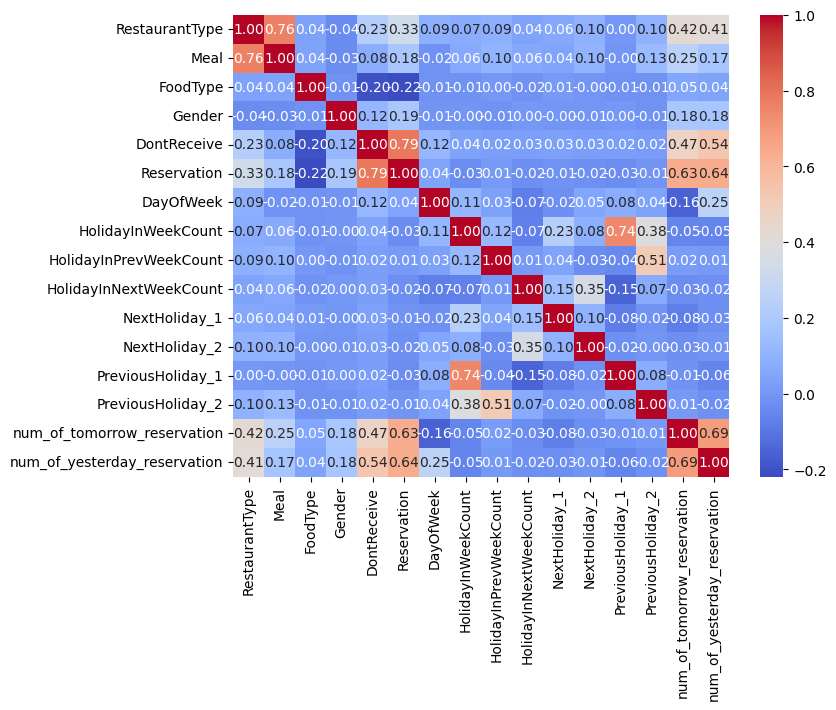

In [50]:
new_df = df.drop(columns=['RestaurantName','FoodName'])
correlation_matrix = new_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Customize with annot, cmap, and fmt

In [51]:
df = pd.get_dummies(df, columns=['RestaurantName', 'FoodName'])
df

,RestaurantType,Meal,FoodType,Gender,DontReceive,Reservation,DayOfWeek,HolidayInWeekCount,HolidayInPrevWeekCount,HolidayInNextWeekCount,...,FoodName_چلوتن ماهی,FoodName_چلوجوجه كباب,FoodName_چلوكباب تابه اي,FoodName_چلوكباب كوبیده,FoodName_چلوكباب كوبیده نگيني,FoodName_چلوكوبيده مرغ,FoodName_چلومرغ مخلوط,FoodName_چلومیرزا قاسمی,FoodName_چلوگوشت,FoodName_چلوگوشت
0,0,1,1,1,0,14,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,1,1,0,3,36,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,1,0,1,0,139,1,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,1,0,0,4,89,1,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,1,0,46,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963,1,1,1,0,8,88,4,1,0,0,...,False,False,False,False,False,False,False,False,False,False
15964,1,1,1,1,23,191,4,1,0,0,...,False,False,False,False,False,False,False,False,False,False
15965,1,1,0,1,91,997,4,1,0,0,...,False,False,False,False,False,False,False,False,False,False
15966,1,0,1,1,10,97,4,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13062 entries, 0 to 15967
Columns: 137 entries, RestaurantType to FoodName_چلوگوشت 
dtypes: bool(121), int64(16)
memory usage: 3.2 MB


# **dimenconality reduction**

## reduction to 2 dimensions

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(df, df['DontReceive'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)  # 25% of train data for validation

# 2. Standardize the data (fit only on train data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)  # Use the same scaler for test and validation

# 3. Apply PCA (fit only on train data)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_kept = explained_variance_ratio.sum() * 100
print(f"Total variance kept after PCA: {total_variance_kept:.2f}%")


Total variance kept after PCA: 4.90%


## reduction to retain 95 percent of variace

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['DontReceive'],axis=1), df['DontReceive'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)  # 25% of train data for validation

# 2. Standardize the data (fit only on train data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)  # Use the same scaler for test and validation

# 3. Apply PCA (fit only on train data)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)


## **decision tree**

### fit

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt = DecisionTreeRegressor(min_samples_split=170)  # You can adjust hyperparameters here
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(min_samples_split=170)

### evaluate on validation and choose hyper parameters

In [56]:
ev = Evaluator({}, X_val_scaled, y_val, X_train_scaled, y_train)
DT = dt.predict(X_val_scaled)
ev.add_or_change_module({'DT': dt})
ev.calculate_evaluators()

,r2,RMSE,r2_score_adj
DT,0.748559,8.749854,0.724662


### evaluate on test

In [57]:
ev = Evaluator({}, X_test_scaled, y_test, X_train_scaled, y_train)
DT = dt.predict(X_test_scaled)
ev.add_or_change_module({'DT': dt})
ev.calculate_evaluators()

,r2,RMSE,r2_score_adj
DT,0.73018,8.883694,0.715359


## **SVR**

### fit

In [74]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=600,gamma='scale')
svr.fit(X_train_scaled,y_train)

SVR(C=600)

### evaluate metrics on validation

In [75]:
ev = Evaluator({}, X_val_scaled, y_val, X_train_scaled, y_train)
DT = svr.predict(X_val_scaled)
ev.add_or_change_module({'SVR': svr})
ev.calculate_evaluators()


,r2,RMSE,r2_score_adj
SVR,0.809202,7.622009,0.791069


In [76]:
ev = Evaluator({}, X_test_scaled, y_test, X_train_scaled, y_train)
DT = svr.predict(X_test_scaled)
ev.add_or_change_module({'SVR': svr})
ev.calculate_evaluators()

,r2,RMSE,r2_score_adj
SVR,0.777646,8.064536,0.765432


R-squared: 0.7350764206629954
Adjusted R-squared: 0.7225419449766415
Root Mean Squared Error: 8.802717241475813
